In [4]:
import pandas as pd

In [5]:
nestle_stock=pd.read_csv('NESTLEIND.NS.csv')
nestle_stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-12,10080.000000,10453.799805,10023.000000,10354.000000,9553.060547,100962
1,2018-09-14,10457.500000,10572.000000,10302.799805,10335.450195,9535.948242,93400
2,2018-09-17,10348.000000,10722.700195,10115.000000,10175.049805,9387.954102,30582
3,2018-09-18,10247.000000,10430.000000,10191.549805,10243.549805,9451.155273,37699
4,2018-09-19,10364.000000,10501.000000,10104.000000,10145.000000,9360.230469,38006
...,...,...,...,...,...,...,...
1229,2023-09-05,21754.550781,21998.599609,21754.550781,21954.449219,21954.449219,62313
1230,2023-09-06,21954.449219,22100.000000,21774.599609,22004.099609,22004.099609,56292
1231,2023-09-07,21978.300781,22085.099609,21822.349609,21896.300781,21896.300781,41159
1232,2023-09-08,21946.000000,21979.349609,21830.000000,21883.250000,21883.250000,30477


In [6]:
nestle_stock=nestle_stock.reset_index()['Close']

In [7]:
nestle_stock.shape

(1234,)

In [8]:
nestle_stock

0       10354.000000
1       10335.450195
2       10175.049805
3       10243.549805
4       10145.000000
            ...     
1229    21954.449219
1230    22004.099609
1231    21896.300781
1232    21883.250000
1233    22127.050781
Name: Close, Length: 1234, dtype: float64

In [9]:
#Normalizing
import numpy as np
from sklearn.preprocessing import MinMaxScaler as mm
scalar=mm(feature_range=(0,1))
nestle_stock=scalar.fit_transform(np.array(nestle_stock).reshape(-1,1))
nestle_stock

array([[0.07323342],
       [0.07188867],
       [0.06026061],
       ...,
       [0.90998061],
       [0.90903451],
       [0.9267086 ]])

In [10]:
#create training and test dataset
training_size=int(len(nestle_stock)*0.65)
test_size=len(nestle_stock)-training_size
train_nestle,test_nestle=nestle_stock[:training_size],nestle_stock[training_size:len(nestle_stock)]

In [11]:
#converting array of vals to dataset matrix
def create_dataset(dataset, time_step=1):
    datax, datay=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return np.array(datax),np.array(datay)

In [12]:
#reshape for x=0,1,2 and y=3
time_step=100
x_train,y_train=create_dataset(train_nestle, time_step)
x_test,y_test=create_dataset(test_nestle, time_step)

In [13]:
print(x_train.shape)

(701, 100)


In [14]:
#converting sets to 3D [samples, time stamps, features] required for LSTM
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [15]:
#LSTM model
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [16]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [17]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 12s 249ms/step - loss: 0.0754 - val_loss: 0.0226
Epoch 2/100
11/11 [==============================] - 1s 135ms/step - loss: 0.0103 - val_loss: 0.0053
Epoch 3/100
11/11 [==============================] - 1s 125ms/step - loss: 0.0061 - val_loss: 0.0235
Epoch 4/100
11/11 [==============================] - 1s 124ms/step - loss: 0.0042 - val_loss: 0.0045
Epoch 5/100
11/11 [==============================] - 1s 123ms/step - loss: 0.0027 - val_loss: 0.0037
Epoch 6/100
11/11 [==============================] - 1s 125ms/step - loss: 0.0023 - val_loss: 0.0044
Epoch 7/100
11/11 [==============================] - 1s 130ms/step - loss: 0.0022 - val_loss: 0.0036
Epoch 8/100
11/11 [==============================] - 1s 130ms/step - loss: 0.0022 - val_loss: 0.0037
Epoch 9/100
11/11 [==============================] - 1s 126ms/step - loss: 0.0022 - val_loss: 0.0029
Epoch 10/100
11/11 [==============================] - 1s 124ms/step - loss: 0.0022 - val_l

Epoch 80/100
11/11 [==============================] - 2s 180ms/step - loss: 7.1428e-04 - val_loss: 7.9148e-04
Epoch 81/100
11/11 [==============================] - 2s 184ms/step - loss: 7.4755e-04 - val_loss: 0.0011
Epoch 82/100
11/11 [==============================] - 2s 175ms/step - loss: 8.3136e-04 - val_loss: 8.2785e-04
Epoch 83/100
11/11 [==============================] - 2s 180ms/step - loss: 9.0809e-04 - val_loss: 5.0446e-04
Epoch 84/100
11/11 [==============================] - 2s 187ms/step - loss: 7.9382e-04 - val_loss: 5.5299e-04
Epoch 85/100
11/11 [==============================] - 2s 163ms/step - loss: 7.2870e-04 - val_loss: 7.1617e-04
Epoch 86/100
11/11 [==============================] - 2s 175ms/step - loss: 7.1401e-04 - val_loss: 7.3366e-04
Epoch 87/100
11/11 [==============================] - 2s 176ms/step - loss: 6.7940e-04 - val_loss: 6.9466e-04
Epoch 88/100
11/11 [==============================] - 2s 178ms/step - loss: 6.3387e-04 - val_loss: 9.8664e-04
Epoch 89/100
1

In [18]:
train_predict=model.predict(x_train) #performance metric check
test_predict=model.predict(x_test)

11/11 [==============================] - 0s 31ms/step


In [19]:
train_predict=scalar.inverse_transform(train_predict) #back to original form
test_predict=scalar.inverse_transform(test_predict)

In [20]:
#RMSE calculation
import math
from sklearn.metrics import mean_squared_error as mse
math.sqrt(mse(y_train, train_predict))

15949.957674837311

In [21]:
math.sqrt(mse(y_test, test_predict))

19974.91808907455

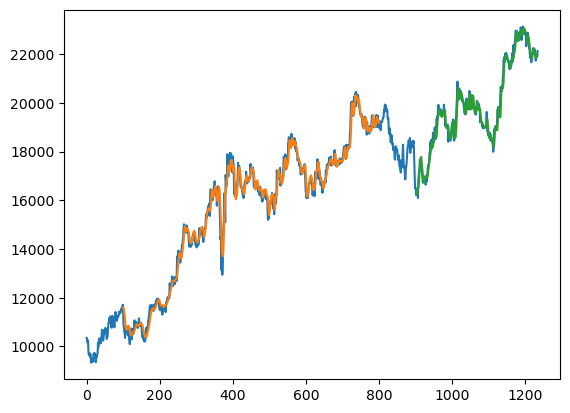

In [24]:
import matplotlib.pyplot as plt
#plotting
look_back=100
train_pp=np.empty_like(nestle_stock)
train_pp[:,:]=np.nan
train_pp[look_back:len(train_predict)+look_back,:]=train_predict
#shift test predictions
test_pp=np.empty_like(nestle_stock)
test_pp[:,:]=np.nan
test_pp[len(train_predict)+(look_back*2)+1:len(nestle_stock)-1,:]=test_predict
#plot
plt.plot(scalar.inverse_transform(nestle_stock))
plt.plot(train_pp)
plt.plot(test_pp)
plt.show() #green is predicted output for test data

In [25]:
#predicting for next 30 days
len(test_nestle)

432

In [26]:
x_input=test_nestle[332:].reshape(1,-1)

In [27]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [28]:
from numpy import array

In [34]:
#prediction for next 30 days
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print("{} day output{}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i+=1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_output))
        
print(lst_output) 

0 day input [0.82248039 0.82073318 0.84690718 0.85568263 0.90020115 0.89907381
 0.90848713 0.8952969  0.91893716 0.91628391 0.9154212  0.92112288
 0.91893362 0.90257533 0.90202794 0.90157853 0.89810605 0.89427109
 0.89503595 0.88087429 0.87426997 0.87259539 0.87943163 0.88717758
 0.89788488 0.88664832 0.89379988 0.90838575 0.92086547 0.90547509
 0.89614149 0.94415784 0.92829256 0.92282281 0.93847428 0.95320868
 0.97032816 0.9875418  0.98771227 0.97511998 0.98676985 0.98213378
 0.95613025 0.95641654 0.96322743 0.96369496 0.96369496 0.9823296
 0.9633543  0.9627381  0.98273553 0.99720162 0.98319216 0.95956281
 0.97928485 0.99434547 0.97699761 1.         0.9951211  0.98833569
 0.98571133 0.99056842 0.98872719 0.97695046 0.9735288  0.97548614
 0.94108053 0.95236056 0.95760915 0.96053779 0.98145967 0.95199087
 0.95044669 0.95079472 0.93411742 0.93333089 0.91675512 0.90607316
 0.91021254 0.91372127 0.89339026 0.90517421 0.91998832 0.91937934
 0.93077548 0.93525198 0.9311633  0.91999554 0.9220

8 day output[[0.92794126]]
9 day input [0.91628391 0.9154212  0.92112288 0.91893362 0.90257533 0.90202794
 0.90157853 0.89810605 0.89427109 0.89503595 0.88087429 0.87426997
 0.87259539 0.87943163 0.88717758 0.89788488 0.88664832 0.89379988
 0.90838575 0.92086547 0.90547509 0.89614149 0.94415784 0.92829256
 0.92282281 0.93847428 0.95320868 0.97032816 0.9875418  0.98771227
 0.97511998 0.98676985 0.98213378 0.95613025 0.95641654 0.96322743
 0.96369496 0.96369496 0.9823296  0.9633543  0.9627381  0.98273553
 0.99720162 0.98319216 0.95956281 0.97928485 0.99434547 0.97699761
 1.         0.9951211  0.98833569 0.98571133 0.99056842 0.98872719
 0.97695046 0.9735288  0.97548614 0.94108053 0.95236056 0.95760915
 0.96053779 0.98145967 0.95199087 0.95044669 0.95079472 0.93411742
 0.93333089 0.91675512 0.90607316 0.91021254 0.91372127 0.89339026
 0.90517421 0.91998832 0.91937934 0.93077548 0.93525198 0.9311633
 0.91999554 0.9220653  0.93188823 0.91651229 0.91137612 0.8985192
 0.91419603 0.91779538 0.

18 day output[[0.9359197]]
19 day input [0.88087429 0.87426997 0.87259539 0.87943163 0.88717758 0.89788488
 0.88664832 0.89379988 0.90838575 0.92086547 0.90547509 0.89614149
 0.94415784 0.92829256 0.92282281 0.93847428 0.95320868 0.97032816
 0.9875418  0.98771227 0.97511998 0.98676985 0.98213378 0.95613025
 0.95641654 0.96322743 0.96369496 0.96369496 0.9823296  0.9633543
 0.9627381  0.98273553 0.99720162 0.98319216 0.95956281 0.97928485
 0.99434547 0.97699761 1.         0.9951211  0.98833569 0.98571133
 0.99056842 0.98872719 0.97695046 0.9735288  0.97548614 0.94108053
 0.95236056 0.95760915 0.96053779 0.98145967 0.95199087 0.95044669
 0.95079472 0.93411742 0.93333089 0.91675512 0.90607316 0.91021254
 0.91372127 0.89339026 0.90517421 0.91998832 0.91937934 0.93077548
 0.93525198 0.9311633  0.91999554 0.9220653  0.93188823 0.91651229
 0.91137612 0.8985192  0.91419603 0.91779538 0.90998061 0.90903451
 0.9267086  0.91893446 0.92215401 0.92399716 0.92500162 0.92558372
 0.92596912 0.92627728 

27 day output[[0.9423729]]
28 day input [0.92086547 0.90547509 0.89614149 0.94415784 0.92829256 0.92282281
 0.93847428 0.95320868 0.97032816 0.9875418  0.98771227 0.97511998
 0.98676985 0.98213378 0.95613025 0.95641654 0.96322743 0.96369496
 0.96369496 0.9823296  0.9633543  0.9627381  0.98273553 0.99720162
 0.98319216 0.95956281 0.97928485 0.99434547 0.97699761 1.
 0.9951211  0.98833569 0.98571133 0.99056842 0.98872719 0.97695046
 0.9735288  0.97548614 0.94108053 0.95236056 0.95760915 0.96053779
 0.98145967 0.95199087 0.95044669 0.95079472 0.93411742 0.93333089
 0.91675512 0.90607316 0.91021254 0.91372127 0.89339026 0.90517421
 0.91998832 0.91937934 0.93077548 0.93525198 0.9311633  0.91999554
 0.9220653  0.93188823 0.91651229 0.91137612 0.8985192  0.91419603
 0.91779538 0.90998061 0.90903451 0.9267086  0.91893446 0.92215401
 0.92399716 0.92500162 0.92558372 0.92596912 0.92627728 0.9265846
 0.92694461 0.92739189 0.92794126 0.92859077 0.92932624 0.93012571
 0.93096626 0.93182474 0.932683

In [35]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
import matplotlib.pyplot as plt

In [40]:
len(nestle_stock)

1234

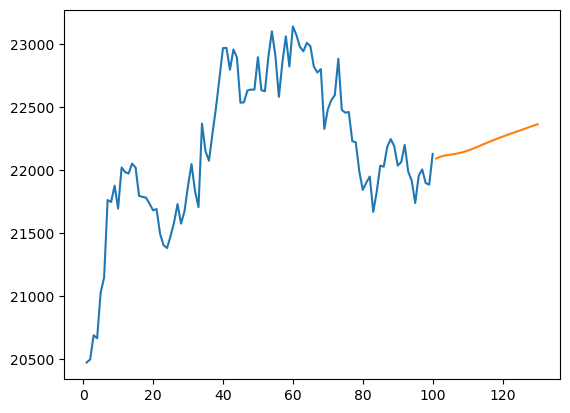

In [41]:
nestle_stock_plt=nestle_stock.tolist()
nestle_stock_plt.extend(lst_output)
plt.plot(day_new, scalar.inverse_transform(nestle_stock[1134:])) #prints all data just before 100 days
plt.plot(day_pred,scalar.inverse_transform(lst_output)) 

# Yellow line shows stock prediction

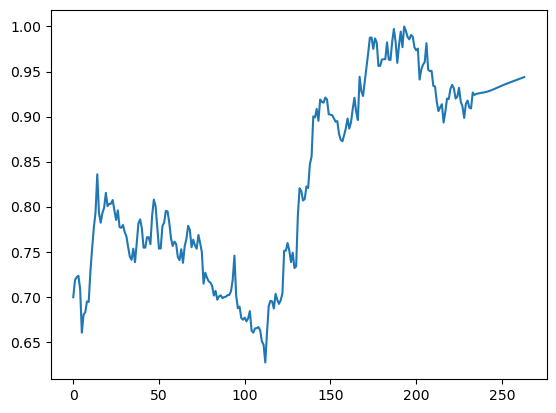

In [38]:

lt.plot(nestle_stock_plt[1000:])